In [1]:
import os,glob
import numpy as np
import pandas as pd
import glob
import pyslha
import time
import progressbar as P
import random,itertools
import fastjet
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os
from atlas_topq_2019_23_Recast import getLHEevents

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [2]:
f = '../../processFolders/sm_ttdec_lo/Events/run_01//unweighted_events.lhe.gz'
events = getLHEevents(f)

In [3]:
pTmin = 355.0
etamax = 2.0
atlas_bins = np.array([355.0,381.0,420.0,478.0,549.0,633.0,720.0,836.0,2000.0])
# ### Leptonic BR
BR = 0.6741*(0.1071+0.1063)*2
pTT = []
weights = []
mcTotal = 0
wtot = 0.0
for ev in events:        
    mcTotal += 1
    wtot += ev.eventinfo.weight
    pTlist = []
    etalist = []
    for ptc in ev.particles:
        if abs(ptc.id) != 6: continue
        pT = np.sqrt(ptc.px**2 + ptc.py**2) 
        p = np.sqrt(ptc.px**2 + ptc.py**2 + ptc.pz**2)
        eta = (1./2.)*np.log((p+ptc.pz)/(p-ptc.pz))
        pTlist.append(pT)
        etalist.append(np.abs(eta))

    # Randomly select one top:
    itop = random.choice([0,1])
    pT = pTlist[itop]
    eta = etalist[itop]
    if pT < pTmin:
        continue
    if eta > etamax:
        continue
    pTT.append(pT)
    weights.append(ev.eventinfo.weight)

weights = np.array(weights)/mcTotal
wtot = wtot/mcTotal
pTtHist,_ = np.histogram(pTT,weights=weights,bins=atlas_bins)
pTtHistError,_ = np.histogram(pTT,weights=weights**2,bins=atlas_bins)
pTtHistError = np.sqrt(pTtHistError)

kfac = 832./wtot
print('xsec (pb) = %1.3e' %wtot)
print('fiducial xsec (pb) = %1.3e' %(sum(weights)*BR))
print('fiducial xsec*kfac (pb) = %1.3e' %(sum(weights)*BR*kfac))
data = np.array(list(zip(atlas_bins[:-1],atlas_bins[1:],pTtHist,pTtHistError)))

xsec (pb) = 4.626e+02
fiducial xsec (pb) = 1.905e+00
fiducial xsec*kfac (pb) = 3.426e+00


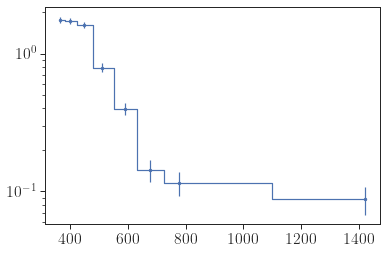

In [4]:
# y,binEdges,_ = plt.hist(pTT,weights=weights[:,0],bins=atlas_bins)
plt.errorbar((atlas_bins[:-1]+atlas_bins[1:])/2, pTtHist, yerr=pTtHistError,marker = '.', drawstyle = 'steps-mid')
plt.yscale('log')
# plt.xlim(500.,1500.)
# plt.ylim(1e-3,1e-1)
plt.show()

In [11]:
max(weights),min(weights),len(weights),mcTotal

(0.0046268, 0.0046268, 1431, 100000)